<a href="https://colab.research.google.com/github/harshvs4/session9_CIFAR_EVA/blob/main/model9_EVA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!git clone https://github.com/harshvs4/codewrapper

In [ ]:
!pip install -r /content/codewrapper/codewrapper_requirement.txt

In [ ]:
import torch
import torch.optim as optim
from torch.optim.lr_scheduler import OneCycleLR
import torch.nn as nn
from torchsummary import summary

from codewrapper.utils.load_data import Cifar10DataLoader
from codewrapper.utils.transforms import CustomResnetTransforms
from codewrapper.model.session9_model import Model9
from codewrapper.utils.train import Train
from codewrapper.utils.test import Test
from codewrapper.utils.helper import *
from codewrapper.main import *

In [ ]:
is_cuda_available, device = get_device()

model = Model9().to(device=device)
summary(model, input_size=(3, 32, 32))

In [5]:
cifar10 = Cifar10DataLoader(CustomResnetTransforms, 512, is_cuda_available)
train_loader = cifar10.get_loader(train=True)
test_loader = cifar10.get_loader(train=False)

  0%|          | 0/170498071 [00:00<?, ?it/s]

Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


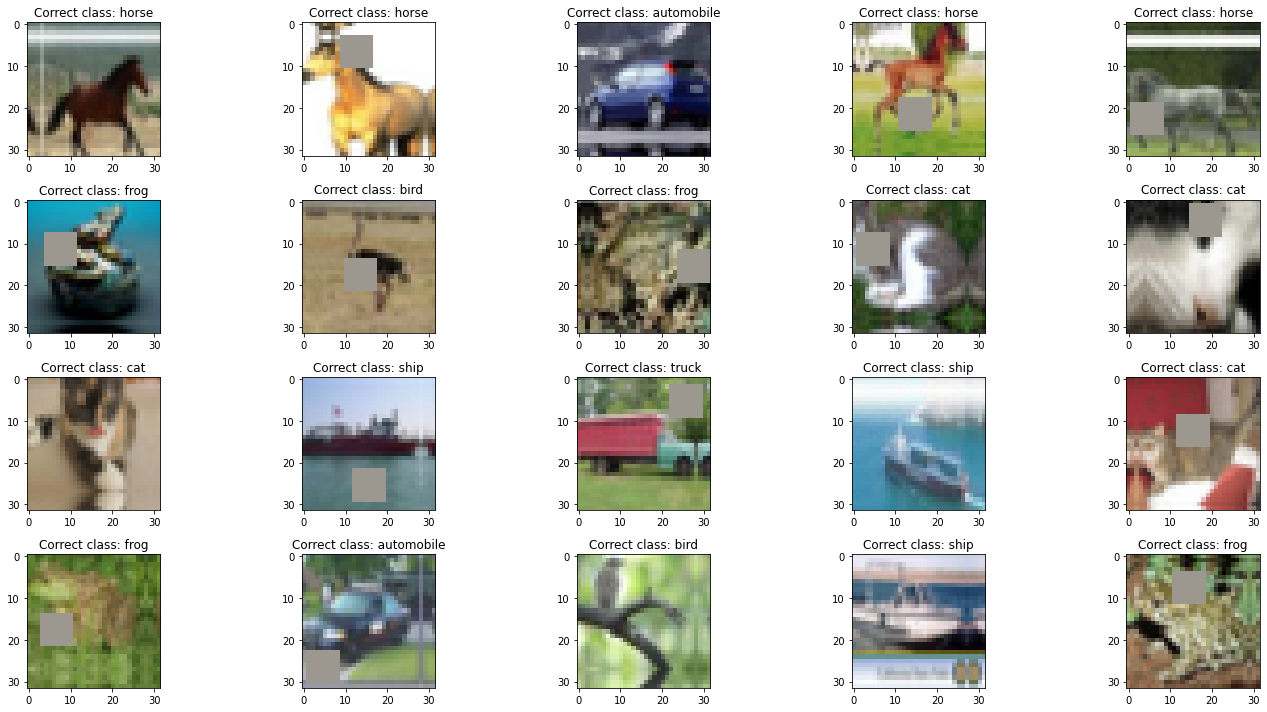

In [6]:
show_training_images(train_loader, 20, cifar10.classes)

Files already downloaded and verified


  0%|          | 0/200 [00:00<?, ?it/s]

Learning rate search finished. See the graph with {finder_name}.plot()
LR suggestion: steepest gradient
Suggested LR: 7.93E-04


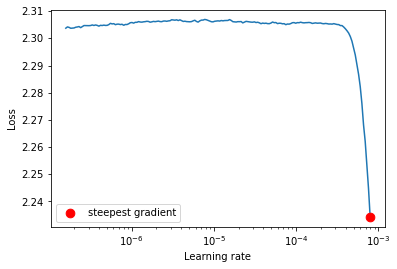

Min Loss = 2.185782882425259, Max LR = 0.001


In [8]:
model = Model9()

cifar10_exp = Cifar10DataLoader(DefaultTransforms, 512, is_cuda_available, shuffle=False)
train_loader_exp = cifar10_exp.get_loader(train=True)

optimizer = optim.Adam(model.parameters(), lr=1e-7)
criterion = nn.CrossEntropyLoss()

min_loss, max_lr = get_lr(model=model, train_loader=train_loader_exp, optimizer=optimizer, criterion=criterion, device=device, end_lr=0.001, num_iter=200,)

In [9]:
EPOCHS = 24

scheduler = OneCycleLR(optimizer, max_lr=max_lr, steps_per_epoch=len(train_loader), epochs=EPOCHS, pct_start=5 / EPOCHS, div_factor=100,three_phase=False, final_div_factor=1000, anneal_strategy="linear",)

train = Train(model, train_loader, optimizer, criterion, device)
test = Test(model, test_loader, criterion, device)

model, history = train_model(train, test, NUM_EPOCHS=EPOCHS, scheduler=scheduler, save_best=False)

EPOCH = 1 | LR = 0.00020840490797546012 | Loss = 2.30 | Batch = 97 | Accuracy = 9.96: 100%|██████████| 98/98 [00:15<00:00,  6.14it/s]


Test set: Average loss: 0.0046, Accuracy: 925/10000 (9.25%)



EPOCH = 2 | LR = 0.0004068098159509203 | Loss = 1.91 | Batch = 97 | Accuracy = 17.31: 100%|██████████| 98/98 [00:16<00:00,  6.05it/s]


Test set: Average loss: 0.0040, Accuracy: 1936/10000 (19.36%)



EPOCH = 3 | LR = 0.0006052147239263804 | Loss = 1.88 | Batch = 97 | Accuracy = 22.54: 100%|██████████| 98/98 [00:16<00:00,  5.81it/s]


Test set: Average loss: 0.0038, Accuracy: 2373/10000 (23.73%)



EPOCH = 4 | LR = 0.0008036196319018405 | Loss = 1.80 | Batch = 97 | Accuracy = 24.69: 100%|██████████| 98/98 [00:15<00:00,  6.21it/s]


Test set: Average loss: 0.0037, Accuracy: 2630/10000 (26.30%)



EPOCH = 5 | LR = 0.000999462948442535 | Loss = 1.79 | Batch = 97 | Accuracy = 26.59: 100%|██████████| 98/98 [00:16<00:00,  6.10it/s]


Test set: Average loss: 0.0036, Accuracy: 2729/10000 (27.29%)



EPOCH = 6 | LR = 0.000946831895810956 | Loss = 1.79 | Batch = 97 | Accuracy = 27.77: 100%|██████████| 98/98 [00:15<00:00,  6.15it/s]


Test set: Average loss: 0.0035, Accuracy: 3022/10000 (30.22%)



EPOCH = 7 | LR = 0.0008942008431793771 | Loss = 1.80 | Batch = 97 | Accuracy = 29.13: 100%|██████████| 98/98 [00:16<00:00,  6.03it/s]


Test set: Average loss: 0.0035, Accuracy: 2988/10000 (29.88%)



EPOCH = 8 | LR = 0.0008415697905477981 | Loss = 1.78 | Batch = 97 | Accuracy = 30.14: 100%|██████████| 98/98 [00:16<00:00,  6.12it/s]


Test set: Average loss: 0.0035, Accuracy: 3123/10000 (31.23%)



EPOCH = 9 | LR = 0.0007889387379162191 | Loss = 1.67 | Batch = 97 | Accuracy = 31.58: 100%|██████████| 98/98 [00:17<00:00,  5.71it/s]


Test set: Average loss: 0.0035, Accuracy: 3058/10000 (30.58%)



EPOCH = 10 | LR = 0.0007363076852846401 | Loss = 1.66 | Batch = 97 | Accuracy = 32.96: 100%|██████████| 98/98 [00:20<00:00,  4.72it/s]


Test set: Average loss: 0.0034, Accuracy: 3364/10000 (33.64%)



EPOCH = 11 | LR = 0.0006836766326530613 | Loss = 1.70 | Batch = 97 | Accuracy = 34.26: 100%|██████████| 98/98 [00:18<00:00,  5.26it/s]


Test set: Average loss: 0.0032, Accuracy: 3672/10000 (36.72%)



EPOCH = 12 | LR = 0.0006310455800214822 | Loss = 1.61 | Batch = 97 | Accuracy = 36.11: 100%|██████████| 98/98 [00:16<00:00,  6.07it/s]


Test set: Average loss: 0.0033, Accuracy: 3488/10000 (34.88%)



EPOCH = 13 | LR = 0.0005784145273899033 | Loss = 1.64 | Batch = 97 | Accuracy = 37.57: 100%|██████████| 98/98 [00:16<00:00,  6.03it/s]


Test set: Average loss: 0.0031, Accuracy: 3802/10000 (38.02%)



EPOCH = 14 | LR = 0.0005257834747583244 | Loss = 1.60 | Batch = 97 | Accuracy = 38.79: 100%|██████████| 98/98 [00:16<00:00,  6.01it/s]


Test set: Average loss: 0.0032, Accuracy: 3796/10000 (37.96%)



EPOCH = 15 | LR = 0.00047315242212674536 | Loss = 1.54 | Batch = 97 | Accuracy = 39.42: 100%|██████████| 98/98 [00:17<00:00,  5.68it/s]


Test set: Average loss: 0.0031, Accuracy: 3986/10000 (39.86%)



EPOCH = 16 | LR = 0.00042052136949516654 | Loss = 1.47 | Batch = 97 | Accuracy = 40.61: 100%|██████████| 98/98 [00:16<00:00,  5.96it/s]


Test set: Average loss: 0.0031, Accuracy: 3900/10000 (39.00%)



EPOCH = 17 | LR = 0.0003678903168635875 | Loss = 1.54 | Batch = 97 | Accuracy = 41.87: 100%|██████████| 98/98 [00:16<00:00,  6.07it/s]


Test set: Average loss: 0.0030, Accuracy: 4259/10000 (42.59%)



EPOCH = 18 | LR = 0.0003152592642320085 | Loss = 1.45 | Batch = 97 | Accuracy = 42.04: 100%|██████████| 98/98 [00:17<00:00,  5.51it/s]


Test set: Average loss: 0.0029, Accuracy: 4328/10000 (43.28%)



EPOCH = 19 | LR = 0.00026262821160042966 | Loss = 1.51 | Batch = 97 | Accuracy = 43.04: 100%|██████████| 98/98 [00:16<00:00,  5.93it/s]


Test set: Average loss: 0.0029, Accuracy: 4351/10000 (43.51%)



EPOCH = 20 | LR = 0.00020999715896885063 | Loss = 1.35 | Batch = 97 | Accuracy = 43.90: 100%|██████████| 98/98 [00:16<00:00,  6.04it/s]


Test set: Average loss: 0.0029, Accuracy: 4478/10000 (44.78%)



EPOCH = 21 | LR = 0.0001573661063372717 | Loss = 1.53 | Batch = 97 | Accuracy = 44.05: 100%|██████████| 98/98 [00:16<00:00,  5.77it/s]


Test set: Average loss: 0.0028, Accuracy: 4524/10000 (45.24%)



EPOCH = 22 | LR = 0.00010473505370569268 | Loss = 1.47 | Batch = 97 | Accuracy = 44.86: 100%|██████████| 98/98 [00:16<00:00,  5.97it/s]


Test set: Average loss: 0.0028, Accuracy: 4571/10000 (45.71%)



EPOCH = 23 | LR = 5.210400107411386e-05 | Loss = 1.44 | Batch = 97 | Accuracy = 44.80: 100%|██████████| 98/98 [00:16<00:00,  6.08it/s]


Test set: Average loss: 0.0028, Accuracy: 4594/10000 (45.94%)



EPOCH = 24 | LR = -5.270515574650608e-07 | Loss = 1.38 | Batch = 97 | Accuracy = 44.76: 100%|██████████| 98/98 [00:16<00:00,  6.01it/s]


Test set: Average loss: 0.0028, Accuracy: 4608/10000 (46.08%)



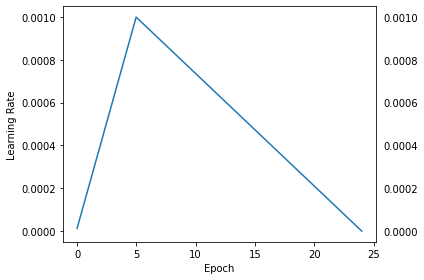

In [10]:
show_lr_history(train, EPOCHS)

In [11]:
print(f"Max LR = {max(train.lr_history)}")
print(f"Min LR = {min(train.lr_history)}")

Max LR = 0.001
Min LR = -5.270515574650608e-07


In [13]:
misclassified_images, predictions, labels = test.get_misclassified_images()

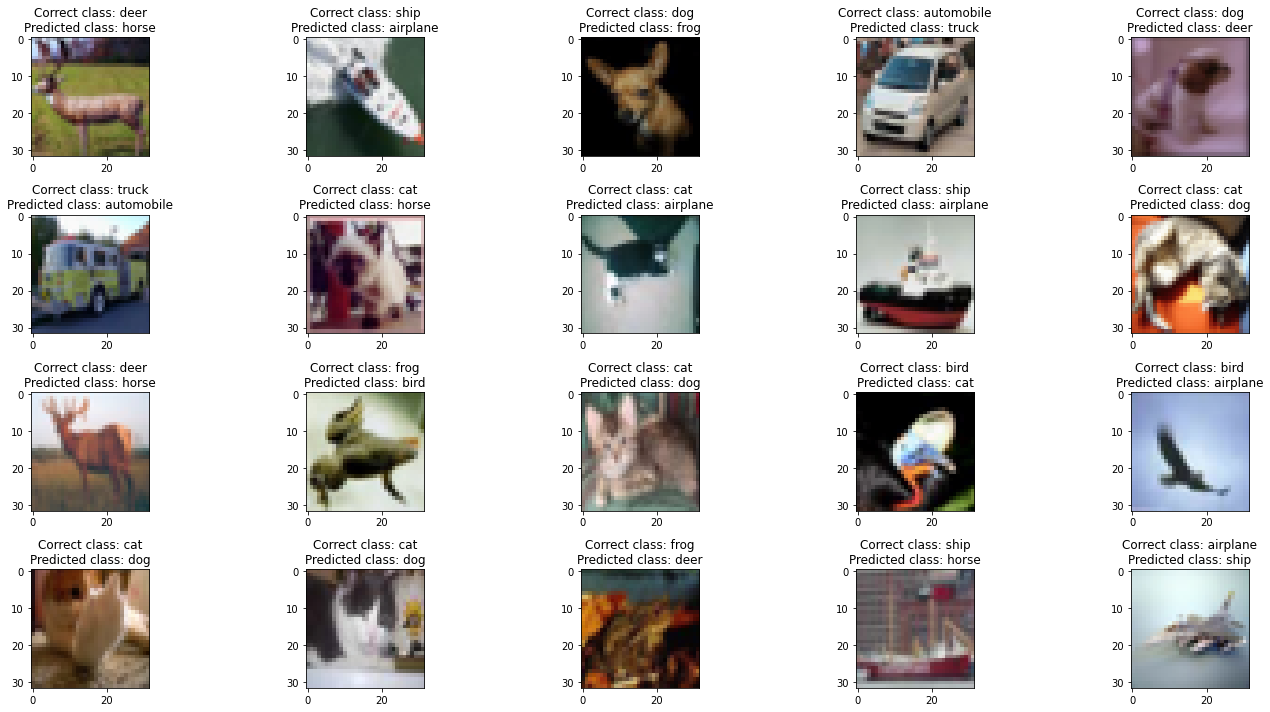

In [14]:
show_misclassified_images(misclassified_images[:20], predictions[:20], labels[:20], cifar10.classes)

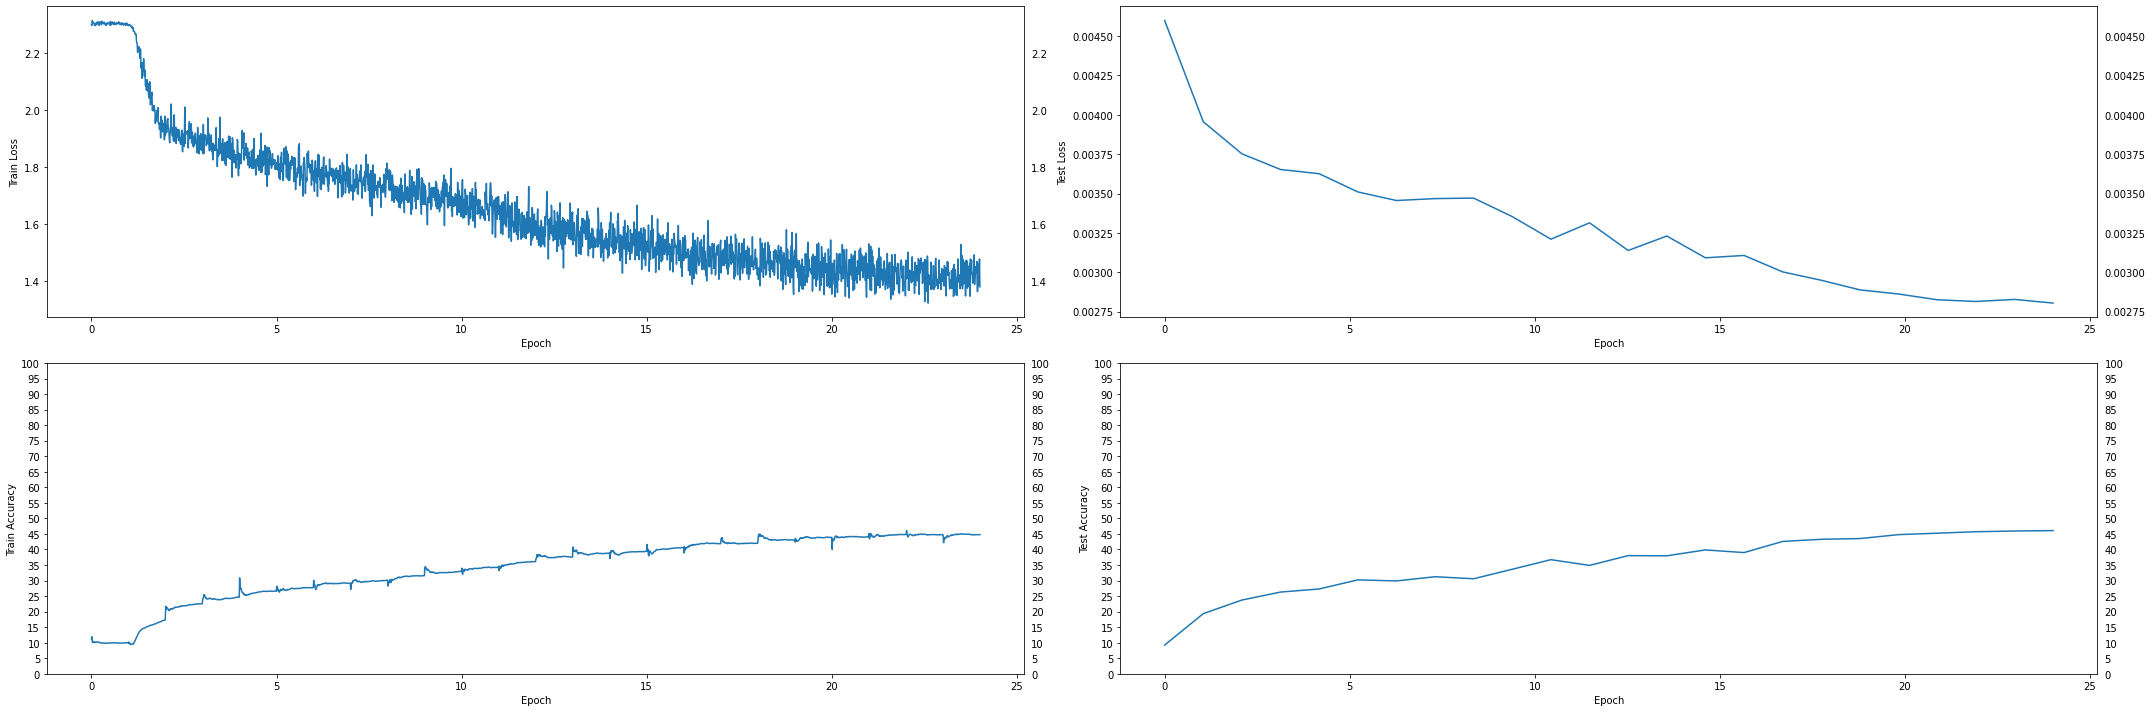

In [15]:
show_losses_and_accuracies(train, test, EPOCHS)